In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [18.0, 6.0]
plt.rcParams['font.size'] = 24.0
plt.rcParams['axes.linewidth'] = 1.8
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['xtick.major.width'] = 1.8
plt.rcParams['ytick.major.width'] = 1.8
plt.rcParams['image.cmap'] = 'gray'

Text(0.5, 1.0, 'MTF')

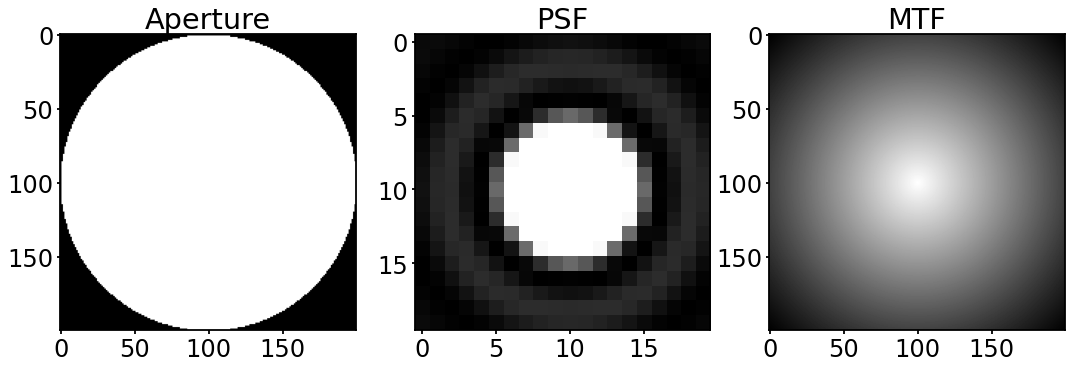

In [87]:
fig, ax = plt.subplots(1,3)
dim = (1024,1024)
radius = 100

aperture = np.zeros(dim,dtype='u2')
yi, xi = np.indices(dim)
aperture[(yi-dim[0]/2)**2+(xi-dim[1]/2)**2<radius**2]=1
impulse = np.fft.fft2(aperture)
psf = (impulse*impulse.conj()).real
psf_disp = np.fft.fftshift(psf)
otf = np.fft.fft2(psf)
mtf = np.absolute(otf)
mtf_disp = np.fft.fftshift(mtf)
ax[0].imshow(aperture[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[0].set_title('Aperture')
ax[1].imshow(psf_disp[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius],vmax=psf.max()//10) # 10x saturated to show rings
ax[1].set_title('PSF')
ax[2].imshow(mtf_disp[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[2].set_title('MTF')

Text(0.5, 1.0, 'MTF')

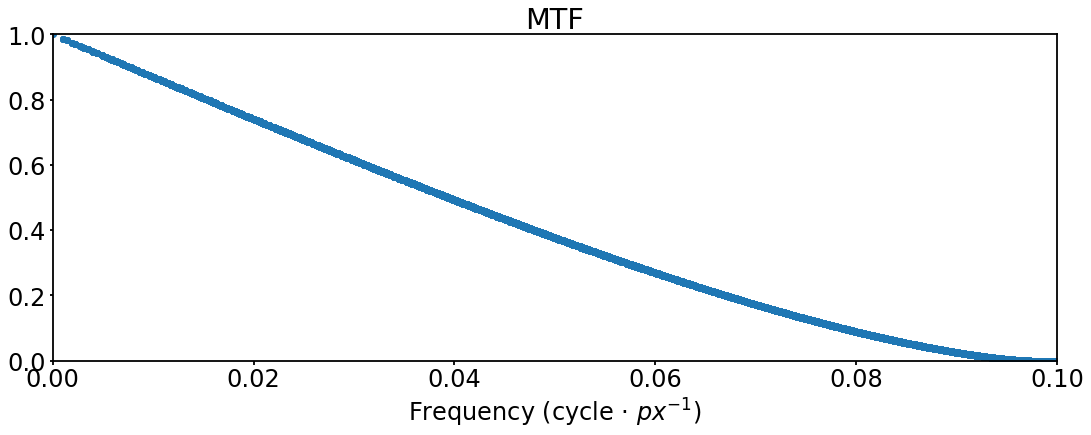

In [85]:
rsquare = (yi-dim[0]/2)**2+(xi-dim[1]/2)**2
r = rsquare**.5
plt.scatter(r / dim[0],mtf_disp/mtf_disp.max())
plt.xlim(0,0.1)
plt.ylim(0,1)
plt.xlabel('Frequency (cycle · $px^{-1}$)')
plt.title('MTF')

In [113]:
plt.rcParams['figure.figsize'] = [12.0, 24.0]

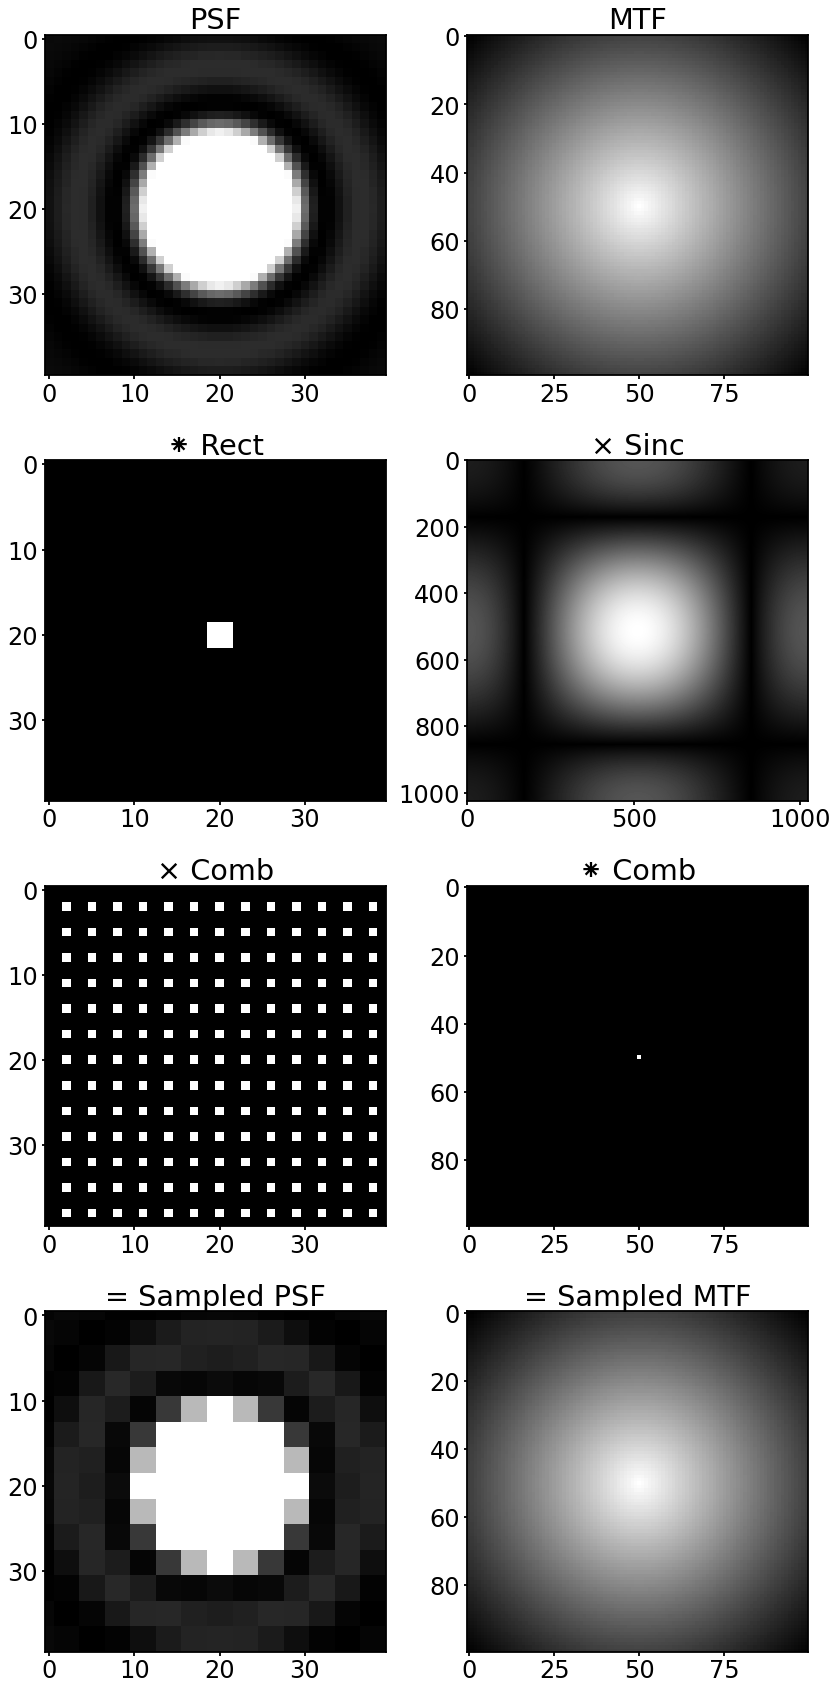

In [120]:
plt.rcParams['figure.figsize'] = [12.0, 24.0]
fig, ax = plt.subplots(4,2)
dim = (1024,1024)
radius = 50
pixel_pitch = 3

aperture = np.zeros(dim,dtype='u2')
yi, xi = np.indices(dim)
aperture[(yi-dim[0]/2)**2+(xi-dim[1]/2)**2<radius**2]=1
impulse = np.fft.fft2(aperture)
psf = (impulse*impulse.conj()).real
psf_disp = np.fft.fftshift(psf)
otf = np.fft.fft2(psf)
mtf = np.absolute(otf)
mtf_disp = np.fft.fftshift(mtf)
ax[0][0].imshow(psf_disp[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius],vmax=psf.max()//10) # 10x saturated to show rings
ax[0][0].set_title('PSF')
ax[0][1].imshow(mtf_disp[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[0][1].set_title('MTF')
rect = np.full_like(psf_disp,pixel_pitch**-2)
rect[(yi-dim[0]/2)**2>(pixel_pitch//2)**2]=0
rect[(xi-dim[1]/2)**2>(pixel_pitch//2)**2]=0
ax[1][0].imshow(rect[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius])
ax[1][0].set_title('⁕ Rect')
sinc = np.absolute(np.fft.fft2(rect))
ax[1][1].imshow(np.fft.fftshift(sinc))
ax[1][1].set_title('× Sinc')
comb = np.zeros_like(psf_disp)
comb[dim[0]//2%pixel_pitch::pixel_pitch,dim[1]//2%pixel_pitch::pixel_pitch]=1
ax[2][0].imshow(comb[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius])
ax[2][0].set_title('× Comb')
ax[2][1].imshow(np.fft.fftshift(np.absolute(np.fft.fft2(comb)))[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[2][1].set_title('⁕ Comb')
pixel_psf = np.fft.ifft2(np.fft.fft2(psf)*np.fft.fft2(np.fft.fftshift(rect))).real
pixel_array_psf = pixel_psf * np.fft.fftshift(comb)
reconstructed_psf = np.fft.ifft2(np.fft.fft2(pixel_array_psf)*np.fft.fft2(np.fft.fftshift(rect*pixel_pitch**2))).real
ax[3][0].imshow(np.fft.fftshift(reconstructed_psf)[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius],vmax=psf.max()//10)
ax[3][0].set_title('= Sampled PSF')
ax[3][1].imshow(np.fft.fftshift(np.absolute(np.fft.fft2(reconstructed_psf)))[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[3][1].set_title('= Sampled MTF')
plt.tight_layout()

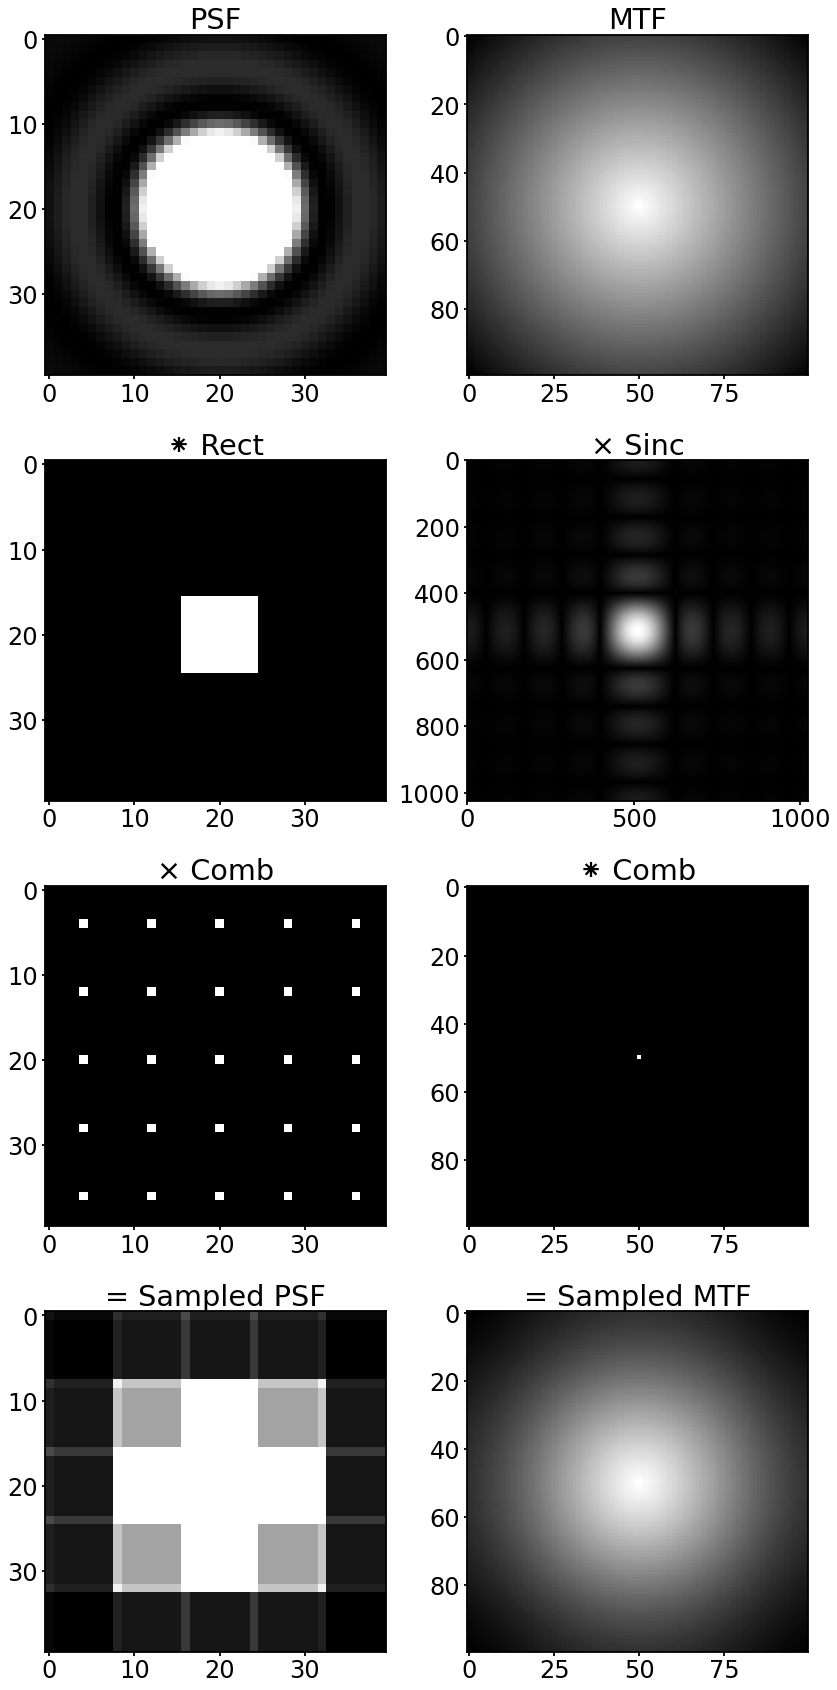

In [128]:
plt.rcParams['figure.figsize'] = [12.0, 24.0]
fig, ax = plt.subplots(4,2)
dim = (1024,1024)
radius = 50
pixel_pitch = 8

aperture = np.zeros(dim,dtype='u2')
yi, xi = np.indices(dim)
aperture[(yi-dim[0]/2)**2+(xi-dim[1]/2)**2<radius**2]=1
impulse = np.fft.fft2(aperture)
psf = (impulse*impulse.conj()).real
psf_disp = np.fft.fftshift(psf)
otf = np.fft.fft2(psf)
mtf = np.absolute(otf)
mtf_disp = np.fft.fftshift(mtf)
ax[0][0].imshow(psf_disp[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius],vmax=psf.max()//10) # 10x saturated to show rings
ax[0][0].set_title('PSF')
ax[0][1].imshow(mtf_disp[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[0][1].set_title('MTF')
rect = np.full_like(psf_disp,pixel_pitch**-2)
rect[(yi-dim[0]/2)**2>(pixel_pitch//2)**2]=0
rect[(xi-dim[1]/2)**2>(pixel_pitch//2)**2]=0
ax[1][0].imshow(rect[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius])
ax[1][0].set_title('⁕ Rect')
sinc = np.absolute(np.fft.fft2(rect))
ax[1][1].imshow(np.fft.fftshift(sinc))
ax[1][1].set_title('× Sinc')
comb = np.zeros_like(psf_disp)
comb[dim[0]//2%pixel_pitch::pixel_pitch,dim[1]//2%pixel_pitch::pixel_pitch]=1
ax[2][0].imshow(comb[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius])
ax[2][0].set_title('× Comb')
ax[2][1].imshow(np.fft.fftshift(np.absolute(np.fft.fft2(comb)))[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[2][1].set_title('⁕ Comb')
pixel_psf = np.fft.ifft2(np.fft.fft2(psf)*np.fft.fft2(np.fft.fftshift(rect))).real
pixel_array_psf = pixel_psf * np.fft.fftshift(comb)
reconstructed_psf_8 = np.fft.ifft2(np.fft.fft2(pixel_array_psf)*np.fft.fft2(np.fft.fftshift(rect*pixel_pitch**2))).real
ax[3][0].imshow(np.fft.fftshift(reconstructed_psf_8)[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius],vmax=psf.max()//10)
ax[3][0].set_title('= Sampled PSF')
ax[3][1].imshow(np.fft.fftshift(np.absolute(np.fft.fft2(reconstructed_psf_8)))[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[3][1].set_title('= Sampled MTF')
plt.tight_layout()

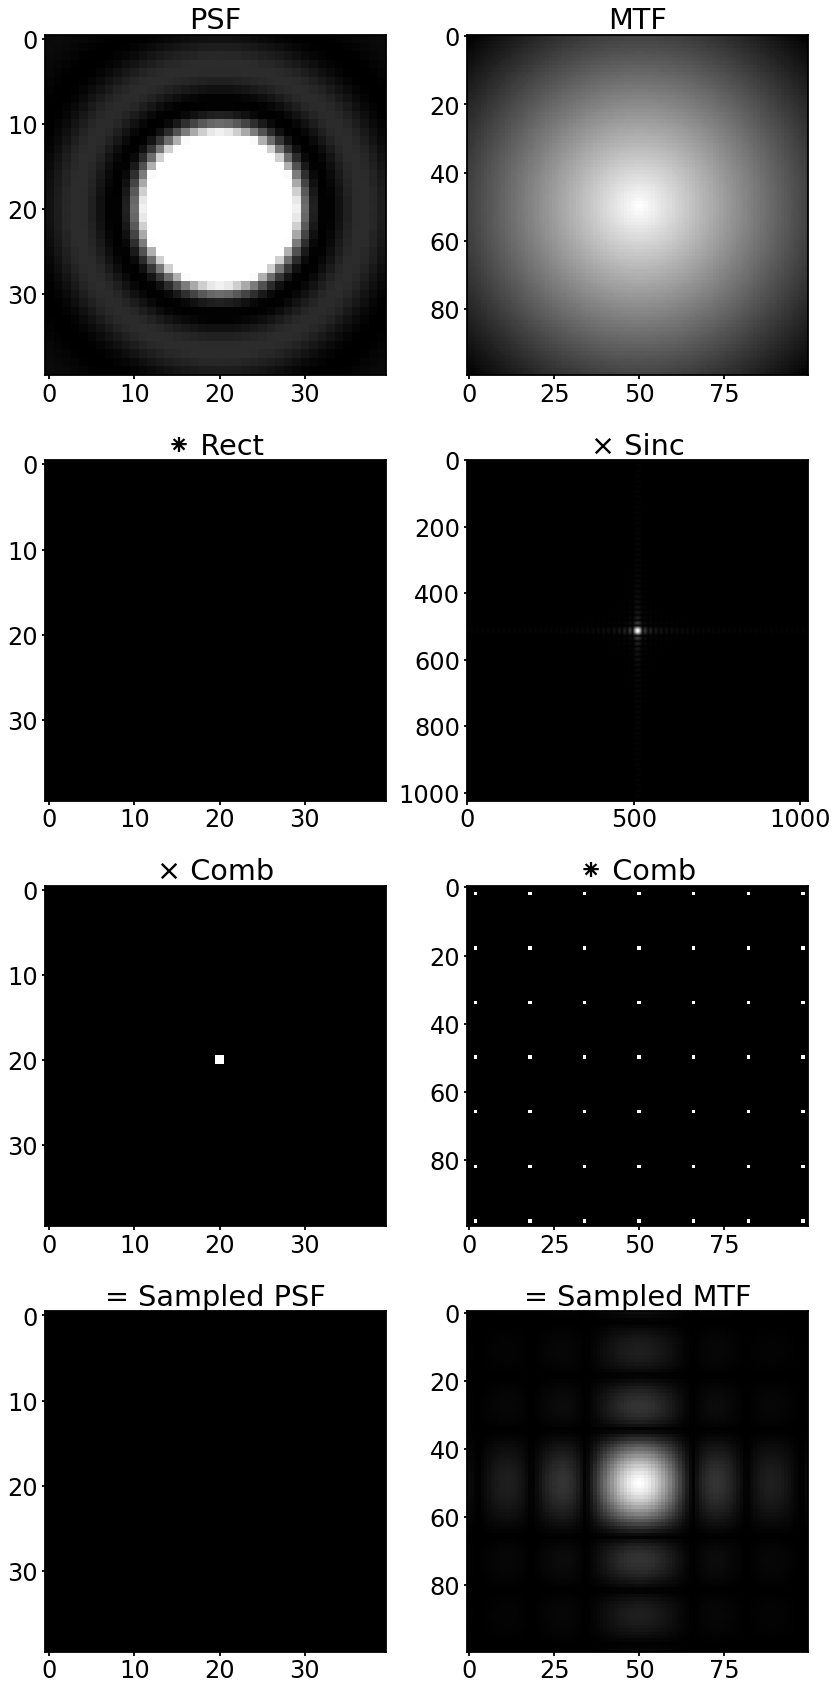

In [129]:
plt.rcParams['figure.figsize'] = [12.0, 24.0]
fig, ax = plt.subplots(4,2)
dim = (1024,1024)
radius = 50
pixel_pitch = 64

aperture = np.zeros(dim,dtype='u2')
yi, xi = np.indices(dim)
aperture[(yi-dim[0]/2)**2+(xi-dim[1]/2)**2<radius**2]=1
impulse = np.fft.fft2(aperture)
psf = (impulse*impulse.conj()).real
psf_disp = np.fft.fftshift(psf)
otf = np.fft.fft2(psf)
mtf = np.absolute(otf)
mtf_disp = np.fft.fftshift(mtf)
ax[0][0].imshow(psf_disp[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius],vmax=psf.max()//10) # 10x saturated to show rings
ax[0][0].set_title('PSF')
ax[0][1].imshow(mtf_disp[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[0][1].set_title('MTF')
rect = np.full_like(psf_disp,pixel_pitch**-2)
rect[(yi-dim[0]/2)**2>(pixel_pitch//2)**2]=0
rect[(xi-dim[1]/2)**2>(pixel_pitch//2)**2]=0
ax[1][0].imshow(rect[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius])
ax[1][0].set_title('⁕ Rect')
sinc = np.absolute(np.fft.fft2(rect))
ax[1][1].imshow(np.fft.fftshift(sinc))
ax[1][1].set_title('× Sinc')
comb = np.zeros_like(psf_disp)
comb[dim[0]//2%pixel_pitch::pixel_pitch,dim[1]//2%pixel_pitch::pixel_pitch]=1
ax[2][0].imshow(comb[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius])
ax[2][0].set_title('× Comb')
ax[2][1].imshow(np.fft.fftshift(np.absolute(np.fft.fft2(comb)))[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[2][1].set_title('⁕ Comb')
pixel_psf = np.fft.ifft2(np.fft.fft2(psf)*np.fft.fft2(np.fft.fftshift(rect))).real
pixel_array_psf = pixel_psf * np.fft.fftshift(comb)
reconstructed_psf_64 = np.fft.ifft2(np.fft.fft2(pixel_array_psf)*np.fft.fft2(np.fft.fftshift(rect*pixel_pitch**2))).real
ax[3][0].imshow(np.fft.fftshift(reconstructed_psf_64)[dim[0]//2-dim[0]//radius:dim[0]//2+dim[0]//radius,dim[1]//2-dim[1]//radius:dim[1]//2+dim[1]//radius],vmax=psf.max()//10)
ax[3][0].set_title('= Sampled PSF')
ax[3][1].imshow(np.fft.fftshift(np.absolute(np.fft.fft2(reconstructed_psf_64)))[dim[0]//2-radius:dim[0]//2+radius,dim[1]//2-radius:dim[1]//2+radius])
ax[3][1].set_title('= Sampled MTF')
plt.tight_layout()

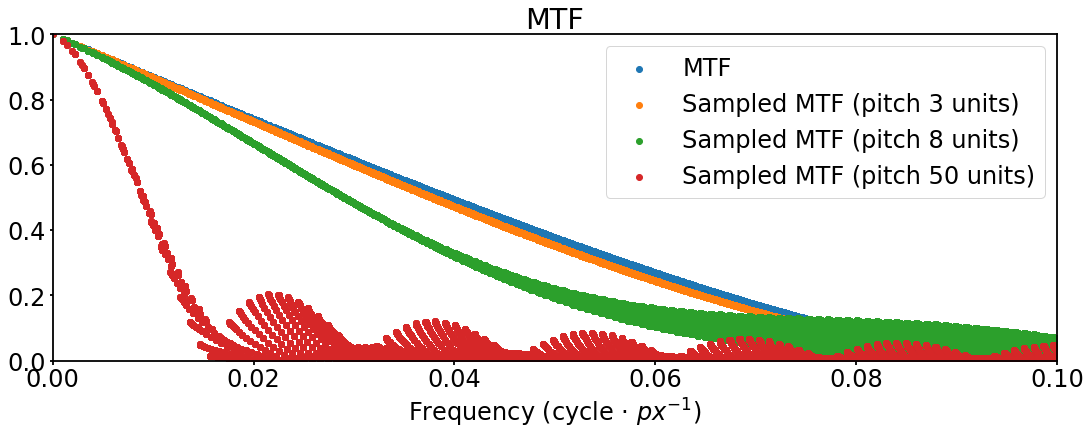

In [131]:
plt.rcParams['figure.figsize'] = [18.0, 6.0]
rsquare = (yi-dim[0]/2)**2+(xi-dim[1]/2)**2
r = rsquare**.5
sampled_mtf_disp = np.fft.fftshift(np.absolute(np.fft.fft2(reconstructed_psf)))
plt.scatter(r / dim[0],mtf_disp/mtf_disp.max(),label='MTF')
plt.scatter(r / dim[0],np.fft.fftshift(t:=np.absolute(np.fft.fft2(reconstructed_psf)))/t.max(),label='Sampled MTF (pitch 3 units)')
plt.scatter(r / dim[0],np.fft.fftshift(t:=np.absolute(np.fft.fft2(reconstructed_psf_8)))/t.max(),label='Sampled MTF (pitch 8 units)')
plt.scatter(r / dim[0],np.fft.fftshift(t:=np.absolute(np.fft.fft2(reconstructed_psf_64)))/t.max(),label='Sampled MTF (pitch 50 units)')
plt.xlim(0,0.1)
plt.ylim(0,1)
plt.xlabel('Frequency (cycle · $px^{-1}$)')
plt.title('MTF')
plt.legend()

In [5]:
for c in plt.rcParams.items():
    print(c)

('_internal.classic_mode', False)
('agg.path.chunksize', 0)
('animation.avconv_args', [])
('animation.avconv_path', 'avconv')
('animation.bitrate', -1)
('animation.codec', 'h264')
('animation.convert_args', [])
('animation.convert_path', 'convert')
('animation.embed_limit', 20.0)
('animation.ffmpeg_args', [])
('animation.ffmpeg_path', 'ffmpeg')
('animation.frame_format', 'png')
('animation.html', 'none')
('animation.html_args', [])
('animation.writer', 'ffmpeg')
('axes.autolimit_mode', 'data')
('axes.axisbelow', 'line')
('axes.edgecolor', 'black')
('axes.facecolor', 'white')
('axes.formatter.limits', [-7, 7])
('axes.formatter.min_exponent', 0)
('axes.formatter.offset_threshold', 4)
('axes.formatter.use_locale', False)
('axes.formatter.use_mathtext', False)
('axes.formatter.useoffset', True)
('axes.grid', False)
('axes.grid.axis', 'both')
('axes.grid.which', 'major')
('axes.labelcolor', 'black')
('axes.labelpad', 4.0)
('axes.labelsize', 'medium')
('axes.labelweight', 'normal')
('axes.li